In [1]:
import argparse
import glob
import os
import os.path as osp
import shutil
import tempfile
import zipfile

import mmcv
import numpy as np
from PIL import Image
import cv2

iSAID_palette = \
    {
        0: (0, 0, 0),
        75: (1, 1, 1),
        92: (2, 2, 2),
        180: (3, 3, 3),
        255: (4, 4, 4)
    }

iSAID_invert_palette = {v: k for k, v in iSAID_palette.items()}


def iSAID_convert_from_color(arr_3d, palette=iSAID_invert_palette):
    """RGB-color encoding to grayscale labels."""
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

path = '/datacommons/carlsonlab/yl407/landcover/data/labels/' 
files = [os.path.splitext(filename)[0] for filename in os.listdir(path)]

for file in files:
    # Prints only text file present in My Folder
    label = mmcv.imread('/datacommons/carlsonlab/yl407/landcover/data/labels/'+str(file)+'.png', channel_order='rgb')
    label = iSAID_convert_from_color(label)
    mmcv.imwrite(label, '/datacommons/carlsonlab/yl407/landcover/data/labels/'+str(file)+'.jpg')

In [5]:
import mmcv
import os.path as osp
data_root = '/datacommons/carlsonlab/yl407/landcover/data/'
ann_dir= 'labels'
img_dir = 'images'
#data_root = 'data'
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
    # select first 4/5 as train set
    train_length = int(len(filename_list)*4/5)
    f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
    # select last 1/5 as train set
    f.writelines(line + '\n' for line in filename_list[train_length:])

(513, 513, 3)


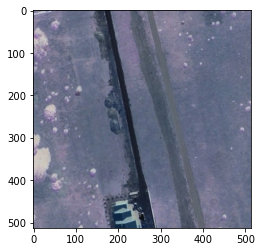

In [6]:
%matplotlib inline
i = 10
file = files[i]
label = mmcv.imread('/datacommons/carlsonlab/yl407/landcover/data/images/'+str(file)+'.png',channel_order='rgb')
from matplotlib import pyplot as plt
#Show the image with matplotlib
print(label.shape)
plt.imshow(label*255)
plt.show()

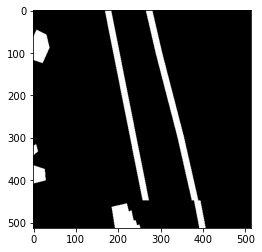

(513, 513, 3)


In [7]:
%matplotlib inline
file = files[i]
label = mmcv.imread('/datacommons/carlsonlab/yl407/landcover/data/labels/'+str(file)+'.png')
from matplotlib import pyplot as plt
#Show the image with matplotlib
plt.imshow(label*255)
plt.show()
print(label.shape)

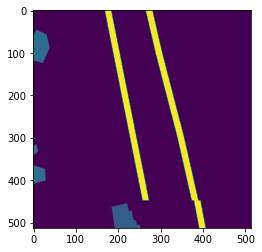

True

In [11]:
%matplotlib inline
import cv2
file = files[i]
label = mmcv.imread('/datacommons/carlsonlab/yl407/landcover/data/labels/'+str(file)+'.png')
label = iSAID_convert_from_color(label)
from matplotlib import pyplot as plt
#Show the image with matplotlib
plt.imshow(label)
plt.show()
mmcv.imwrite(label, '/hpc/home/yl407/'+str(file)+'.jpg')

(513, 513, 3)


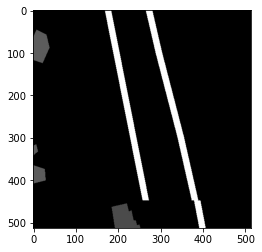

In [15]:
%matplotlib inline
file = files[i]
#label = mmcv.imread('/hpc/home/yl407/'+str(file)+'.jpg',cv2.IMREAD_UNCHANGED)
label = mmcv.imread('/hpc/home/yl407/'+str(file)+'.jpg')
print(label.shape)
#label = iSAID_convert_from_color(label)
from matplotlib import pyplot as plt
#Show the image with matplotlib
plt.imshow(label)
plt.show()
#mmcv.imwrite(label, '/hpc/home/yl407/'+str(file)+'.png')

In [ ]:
%matplotlib inline
file = files[i]
label = mmcv.imread('/datacommons/carlsonlab/yl407/landcover/data/labels/'+str(file)+'.jpg')
#label = iSAID_convert_from_color(label)
from matplotlib import pyplot as plt
#Show the image with matplotlib
plt.imshow(label)
plt.show()

### Inference with trained model

In [62]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [63]:
config_file = '/hpc/home/yl407/carlsonlab/segnext/SegNeXt/local_configs/segnext/tiny/segnext.tiny.512x512.landcover.py'
checkpoint_file = '/hpc/home/yl407/carlsonlab/segnext/SegNeXt/work_dirs/segnext.tiny.512x512.landcover/iter_2000.pth'

In [64]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

spatial True
S 1
D 512
R 16
train_steps 6
eval_steps 7
inv_t 100
eta 0.9
rand_init True
load checkpoint from local path: /hpc/home/yl407/carlsonlab/segnext/SegNeXt/work_dirs/segnext.tiny.512x512.landcover/iter_2000.pth


In [65]:
file = files[7]
img = '/datacommons/carlsonlab/yl407/landcover/data/images/'+str(file)+'.png'
result = inference_segmentor(model, img)

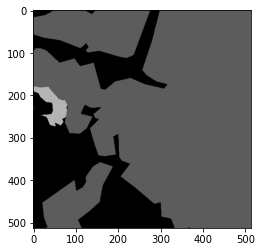

In [68]:
file = files[7]
label = mmcv.imread('/datacommons/carlsonlab/yl407/landcover/data/labels/'+str(file)+'.jpg')
plt.imshow(label)
plt.show()

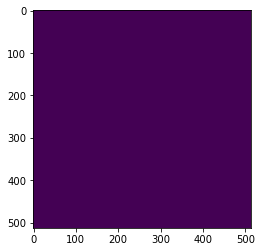

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
#Show the image with matplotlib
plt.imshow(result[0])
plt.show()

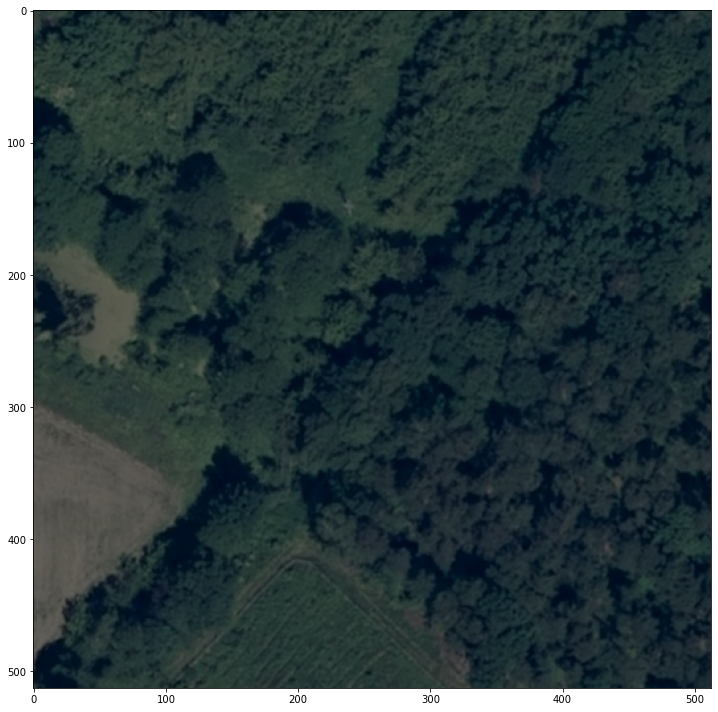

In [67]:
# show the results
PALETTE = [[0,0,0], [75,75,75], [92,92,92], [180,180,180], [255,255,255]]
show_result_pyplot(model, img, result,PALETTE)